In [1]:
#Import required modules

import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style = "whitegrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Plotting preferences
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
import string
import re

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
# Read input NBA dataset
df = pd.read_csv("nba_elo.csv")

In [3]:
df.columns

Index([u'date', u'season', u'neutral', u'playoff', u'team1', u'team2',
       u'elo1_pre', u'elo2_pre', u'elo_prob1', u'elo_prob2', u'elo1_post',
       u'elo2_post', u'carmelo1_pre', u'carmelo2_pre', u'carmelo1_post',
       u'carmelo2_post', u'carmelo_prob1', u'carmelo_prob2', u'score1',
       u'score2'],
      dtype='object')

In [4]:
df.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carmelo1_pre,carmelo2_pre,carmelo1_post,carmelo2_post,carmelo_prob1,carmelo_prob2,score1,score2
0,1946-11-01,1947,0,NaN,TRH,NYK,1300.0,1300.0000,0.640065,0.359935,1293.2767,1306.7233,NaN,NaN,NaN,NaN,NaN,NaN,66,68
1,1946-11-02,1947,0,NaN,CHS,NYK,1300.0,1306.7233,0.631101,0.368899,1309.6521,1297.0712,NaN,NaN,NaN,NaN,NaN,NaN,63,47
2,1946-11-02,1947,0,NaN,PRO,BOS,1300.0,1300.0000,0.640065,0.359935,1305.1542,1294.8458,NaN,NaN,NaN,NaN,NaN,NaN,59,53
3,1946-11-02,1947,0,NaN,STB,PIT,1300.0,1300.0000,0.640065,0.359935,1304.6908,1295.3092,NaN,NaN,NaN,NaN,NaN,NaN,56,51
4,1946-11-02,1947,0,NaN,DTF,WSC,1300.0,1300.0000,0.640065,0.359935,1279.6189,1320.3811,NaN,NaN,NaN,NaN,NaN,NaN,33,50


In [5]:
df.shape

(67094, 20)

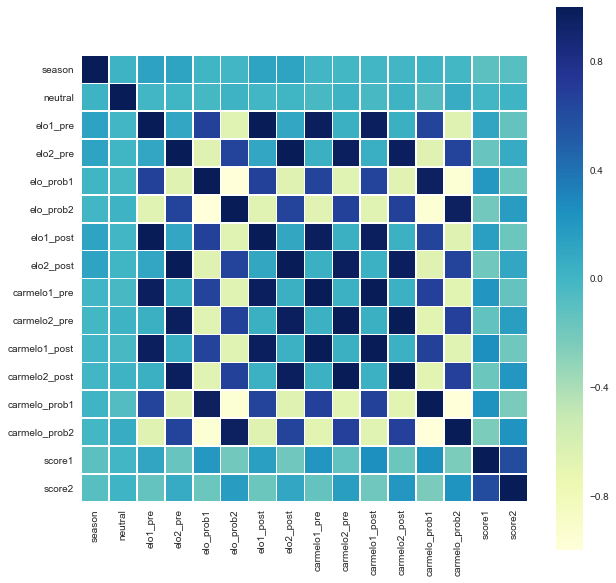

In [7]:
#Plotting correlation among all features in our dataframe

fig, ax = plt.subplots(figsize=(10,10)) 
cor = df.corr()
sns.heatmap(cor, square = True, linewidths=.5, ax=ax,cmap="YlGnBu")

In [8]:
df.describe()

,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carmelo1_pre,carmelo2_pre,carmelo1_post,carmelo2_post,carmelo_prob1,carmelo_prob2,score1,score2
count,67094.000000,67094.000000,67094.000000,67094.000000,67094.000000,67094.000000,67094.000000,67094.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,67094.000000,67094.000000
mean,1989.890244,0.000402,1496.130655,1496.374871,0.621156,0.378844,1496.091962,1496.413564,1514.063424,1511.790884,1513.012250,1512.842057,0.627628,0.372372,104.694295,101.005112
std,18.353471,0.020057,112.541205,111.973834,0.178271,0.178271,112.997297,112.158110,119.434553,119.060992,119.884060,119.026822,0.192276,0.192276,14.837538,14.280889
min,1947.000000,0.000000,1105.617800,1091.644500,0.062616,0.018315,1100.291900,1085.774400,1187.730784,1192.842155,1187.730784,1192.004524,0.060474,0.013407,2.000000,0.000000
25%,1975.000000,0.000000,1418.390450,1418.476450,0.498694,0.240387,1417.754550,1418.616875,1435.901985,1434.250129,1434.376036,1435.176494,0.496332,0.221409,95.000000,92.000000
50%,1992.000000,0.000000,1501.363800,1502.459350,0.640045,0.359955,1501.409100,1502.342150,1511.853832,1510.142031,1510.411054,1511.829531,0.653200,0.346800,105.000000,101.000000
75%,2006.000000,0.000000,1576.469050,1575.943150,0.759613,0.501306,1576.623625,1576.220050,1586.428017,1582.333212,1585.163557,1583.328920,0.778591,0.503668,114.000000,110.000000
max,2018.000000,1.000000,1855.779115,1865.449075,0.981685,0.937384,1860.313175,1865.449075,1872.690559,1881.619599,1876.930941,1881.619599,0.986593,0.939526,184.000000,186.000000


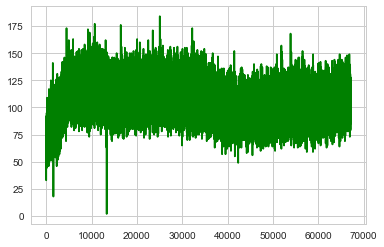

In [11]:
line = plt.figure()
plt.plot(df["score1"],color='green');

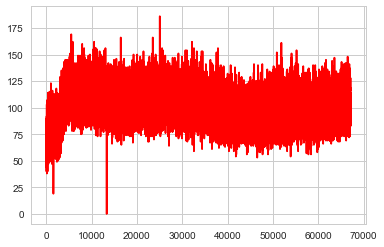

In [12]:
line = plt.figure()
plt.plot(df["score2"],color='red');

In [13]:
df.isnull().sum()

date                 0
season               0
neutral              0
playoff          62814
team1                0
team2                0
elo1_pre             0
elo2_pre             0
elo_prob1            0
elo_prob2            0
elo1_post            0
elo2_post            0
carmelo1_pre     63157
carmelo2_pre     63157
carmelo1_post    63157
carmelo2_post    63157
carmelo_prob1    63157
carmelo_prob2    63157
score1               0
score2               0
dtype: int64

In [14]:
df = df.drop(['playoff'],axis=1)

In [15]:
df = df.drop(['carmelo1_pre', 'carmelo2_pre', 'carmelo1_post', 'carmelo2_post',
        'carmelo_prob1', 'carmelo_prob2'],axis=1)

In [16]:
df.head()

,date,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,score1,score2
0,1946-11-01,1947,0,TRH,NYK,1300.0,1300.0000,0.640065,0.359935,1293.2767,1306.7233,66,68
1,1946-11-02,1947,0,CHS,NYK,1300.0,1306.7233,0.631101,0.368899,1309.6521,1297.0712,63,47
2,1946-11-02,1947,0,PRO,BOS,1300.0,1300.0000,0.640065,0.359935,1305.1542,1294.8458,59,53
3,1946-11-02,1947,0,STB,PIT,1300.0,1300.0000,0.640065,0.359935,1304.6908,1295.3092,56,51
4,1946-11-02,1947,0,DTF,WSC,1300.0,1300.0000,0.640065,0.359935,1279.6189,1320.3811,33,50


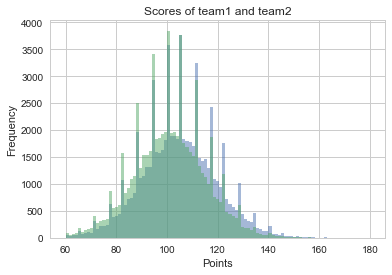

In [18]:
plt.figure()
bins = np.linspace(60, 180, 100)
plt.title("Scores of team1 and team2")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.hist(df["score1"],bins, alpha=0.5)
plt.hist(df["score2"],bins, alpha=0.5)
plt.show()

In [19]:
#Getting winning and losing teams scores from the dataframe
scores = pd.DataFrame([df["score1"],df["score2"]])
winner_scores = scores.max(0)
looser_scores = scores.min(0)

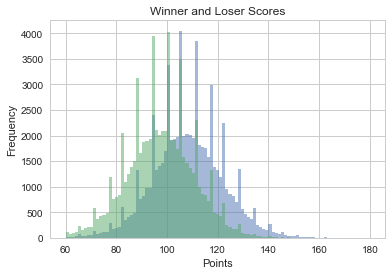

In [20]:
#Plotting winning vs losing scores
plt.figure()
bins = np.linspace(60, 180, 100)
plt.title("Winner and Loser Scores")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.hist(winner_scores,bins, alpha=0.5)
plt.hist(looser_scores,bins, alpha=0.5)
plt.show()

In [22]:
# Create a new feature that says true or false, based on whether the home team wins or loses respectively. 

#Copying the dataframe into another df
nba = df
y = nba["score1"]>nba["score2"]
y.head()

0    False
1     True
2     True
3     True
4    False
dtype: bool

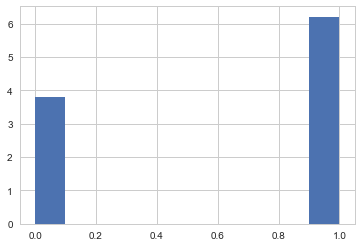

In [23]:
# Plotting the home teams wins and losses
plt.hist(y, density=True);